<a href="https://colab.research.google.com/github/preranasahu/LGMVIP-DataScience/blob/main/Tash_3_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Level 1:Beginner

Author-Prerana sahu

Task 3- Music recommendation

Dataset- https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np 
import seaborn as sns

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
#test = reduce_mem_usage(pd.read_csv('test.csv'))
ext_song = reduce_mem_usage(pd.read_csv('song_extra_info.csv'))
members = (pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date']))
songs = reduce_mem_usage(pd.read_csv('songs.csv'))

Memory usage of dataframe is 31.90 MB
Memory usage after optimization is: 11.26 MB
Decreased by 64.7%
Memory usage of dataframe is 47.85 MB
Memory usage after optimization is: 260.70 MB
Decreased by -444.9%
Memory usage of dataframe is 87.90 MB
Memory usage after optimization is: 151.86 MB
Decreased by -72.8%


In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696827 entries, 0 to 696826
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   msno                696827 non-null  category
 1   song_id             696827 non-null  category
 2   source_system_tab   694838 non-null  category
 3   source_screen_name  664911 non-null  category
 4   source_type         695153 non-null  category
 5   target              696826 non-null  float16 
dtypes: category(5), float16(1)
memory usage: 11.3 MB


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645954 entries, 0 to 1645953
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   song_id      1645954 non-null  category
 1   song_length  1645954 non-null  int32   
 2   genre_ids    1581696 non-null  category
 3   artist_name  1645954 non-null  category
 4   composer     884380 non-null   category
 5   lyricist     267159 non-null   category
 6   language     1645953 non-null  float16 
dtypes: category(5), float16(1), int32(1)
memory usage: 151.9 MB


In [ ]:
ext_song.head()


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
ext_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090435 entries, 0 to 2090434
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     category
dtypes: category(3)
memory usage: 260.7 MB


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


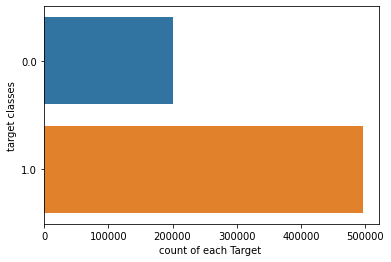

In [ ]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

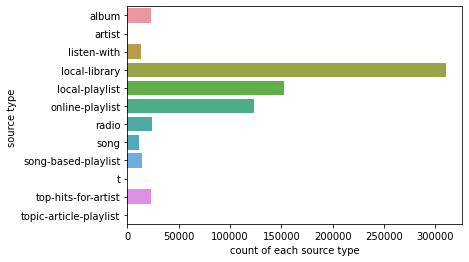

In [ ]:
sns.countplot(y=train['source_type'],data=train)
plt.ylabel('source type ')
plt.xlabel('count of each source type')
plt.show()

In [ ]:

#mising values
def miss_val(df):
    for col in df.columns:
        nan_count=df[col].isnull().sum()
        total= df.shape[0]
        pp= (nan_count/ total )* 100
        #print(type(pp))
        print(col,'has' ,pp,'% missing values')

In [ ]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.28543670093150814 % missing values
source_screen_name has 4.580189918014084 % missing values
source_type has 0.24023179354416518 % missing values
target has 0.0001435076424995013 % missing values


In [ ]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
gender has 57.84960613899951 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [ ]:
print('Song data')
miss_val(songs)

Song data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 3.903997317057464 % missing values
artist_name has 0.0 % missing values
composer has 46.269458320220366 % missing values
lyricist has 83.76874444850829 % missing values
language has 6.075503932673696e-05 % missing values


In [ ]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.00014351080038365222 % missing values
isrc has 6.251091280044584 % missing values


In [ ]:
train['source_system_tab'].value_counts()

my library      479614
discover        137532
search           28859
radio            24090
listen with      13550
explore          10472
notification       396
settings           325
Name: source_system_tab, dtype: int64

In [ ]:

#replace with my library 
train['source_system_tab'].fillna('my library',inplace=True)

In [ ]:
train['source_type'].value_counts()

local-library             310811
local-playlist            152785
online-playlist           122971
radio                      23975
album                      22965
top-hits-for-artist        22660
song-based-playlist        13709
listen-with                12724
song                       11363
artist                       678
topic-article-playlist       511
t                              1
Name: source_type, dtype: int64

In [ ]:
#replace with local-library 
train['source_type'].fillna('local-library',inplace=True)

In [ ]:
train['source_screen_name'].value_counts()

Local playlist more     445823
Online playlist more     78142
Radio                    23677
Album more               18991
Discover Chart           17814
Search                   14560
Discover Feature         14547
Artist more              13045
Others profile more      12416
My library               11295
Explore                   5370
Discover Genre            4357
Unknown                   2207
Search Home                779
Discover New               694
Search Trends              651
My library_Search          517
Self profile more           25
Concert                      1
Name: source_screen_name, dtype: int64

In [ ]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.0 % missing values
source_screen_name has 4.580189918014084 % missing values
source_type has 0.0 % missing values
target has 0.0001435076424995013 % missing values


In [ ]:
members.drop(['gender'], axis =1, inplace=True)


In [ ]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [ ]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
songs['genre_ids'].value_counts()

465                  426147
958                  122338
2022                 119819
1609                 118744
2122                  96091
                      ...  
359|423                   1
465|109|958               1
465|1138|109              1
1609|958|2086|374         1
829|691                   1
Name: genre_ids, Length: 963, dtype: int64

In [ ]:
#replace with 465 
songs['genre_ids'].fillna('465',inplace=True)

In [ ]:
songs['language'].value_counts()

 52.0    937837
-1.0     447802
 3.0      90890
 17.0     73208
 24.0     33378
 31.0     31752
 10.0     13376
 45.0     10103
 59.0      5950
 38.0      1656
 1.0          1
Name: language, dtype: int64

In [ ]:
#replace with 465 
songs['language'].fillna(52.0,inplace=True)


In [ ]:
print('songs.info data')
miss_val(songs)

songs.info data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 0.0 % missing values
artist_name has 0.0 % missing values
language has 0.0 % missing values


In [ ]:
ext_song['name'].value_counts()

Intro                                                      1584
Silent Night                                                996
White Christmas                                             904
Jingle Bells                                                882
Ave Maria                                                   728
                                                           ... 
Shout| Pt. 1 & 2                                              1
Shout| Brother| Shout                                         1
Shouts Of Joy                                                 1
Shouts (Alt)                                                  1
  1. Boom (Dimitri Vangelis & Wyman Remix (Radio Edit))       1
Name: name, Length: 1083051, dtype: int64

In [ ]:
#replace with Into 
ext_song['name'].fillna('Intro',inplace=True)

In [ ]:
ext_song['isrc'].value_counts()

GBPS81527416    188
GBPS81518952    183
GBPS81518680    175
GBPS81527413    173
GBPS81518950    172
               ... 
TCACT1662242      1
TCACT1662243      1
TCACT1662310      1
TCACT1662358      1
AAA201604180      1
Name: isrc, Length: 1646601, dtype: int64

In [ ]:
#replace with Into 
ext_song['isrc'].fillna('GBPS81518952',inplace=True)

In [ ]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 0.0 % missing values


In [ ]:
#meging data
songs_all= pd.merge(songs,ext_song,
                     on ='song_id' ,how='left')
train_memebrs= pd.merge(train,members,
                    on ='msno' ,how='left')
train_data= pd.merge(train_memebrs,songs_all,
                     on ='song_id' ,how='left')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696827 entries, 0 to 696826
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    696827 non-null  object        
 1   song_id                 696827 non-null  object        
 2   source_system_tab       696827 non-null  category      
 3   source_screen_name      664911 non-null  category      
 4   source_type             696827 non-null  category      
 5   target                  696826 non-null  float16       
 6   city                    696827 non-null  int64         
 7   bd                      696827 non-null  int64         
 8   registered_via          696827 non-null  int64         
 9   registration_init_time  696827 non-null  datetime64[ns]
 10  expiration_date         696827 non-null  datetime64[ns]
 11  song_length             640325 non-null  float64       
 12  genre_ids               640325

In [ ]:
train_data.drop(['msno'], axis =1, inplace=True)
train_data.drop(['song_id'], axis =1, inplace=True)
train_data.drop(['isrc'], axis =1, inplace=True)
train_data.drop(['artist_name'], axis =1, inplace=True)
train_data.drop(['genre_ids'], axis =1, inplace=True)
train_data.drop(['name'], axis =1, inplace=True)

In [ ]:
train_data['membership_days'] = train_data['expiration_date'].subtract(train_data['registration_init_time']).dt.days.astype(int)
train_data['registration_year'] = train_data['registration_init_time'].dt.year
train_data['expiration_year'] = train_data['expiration_date'].dt.year
train_data.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
train_data.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
0,explore,Explore,online-playlist,1.0,1,0,7,206471.0,52.0,2103,2012,2017
1,my library,Local playlist more,local-playlist,1.0,13,24,9,284584.0,52.0,2301,2011,2017
2,my library,Local playlist more,local-playlist,1.0,13,24,9,225396.0,52.0,2301,2011,2017
3,my library,Local playlist more,local-playlist,1.0,13,24,9,255512.0,-1.0,2301,2011,2017
4,explore,Explore,online-playlist,1.0,1,0,7,187802.0,52.0,2103,2012,2017


In [ ]:
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train_data[f].values) )
    train_data[f] = lb.transform(list(train_data[f].values))

In [ ]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col] = train_data[col].astype('category')

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0001435076424995013 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 8.108468816506823 % missing values
language has 8.108468816506823 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [ ]:
train_data['song_length'].value_counts()

215144.0    2848
219324.0    2795
287328.0    2518
227343.0    2436
290063.0    2337
            ... 
385985.0       1
232892.0       1
232865.0       1
232864.0       1
131053.0       1
Name: song_length, Length: 24262, dtype: int64

In [ ]:

#replace with Into 
train_data['song_length'].fillna(235415.0 ,inplace=True)

In [ ]:
train_data['language'].value_counts()

 3.0     362779
 52.0    160071
 31.0     57474
-1.0      21843
 17.0     16865
 10.0     14371
 24.0      6494
 59.0       275
 45.0       145
 38.0         8
Name: language, dtype: int64

In [ ]:
train_data['language'].fillna(3.0 ,inplace=True)

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0001435076424995013 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [ ]:
train_data.replace([np.inf,-np.inf],np.nan, inplace =True)

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0001435076424995013 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
train_data.shape

(696827, 12)

In [ ]:
train_data = train_data.sample(frac = 1)

In [ ]:
train_data1=train_data[0:30000]

In [ ]:
train_data1.shape

(30000, 12)

In [ ]:
train_data1.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
30733,3,8,3,0.0,1,0,7,208143.0,52.0,548,2016,2017
474862,5,13,6,1.0,5,54,9,240326.0,-1.0,2630,2010,2017
275412,0,11,5,1.0,22,32,9,283846.0,3.0,4118,2006,2017
273616,0,5,5,1.0,13,30,9,235415.0,3.0,4350,2005,2017
618297,3,8,3,1.0,1,0,7,211670.0,31.0,1216,2014,2017


In [ ]:
x = train_data1.drop(['target'], axis =1)
y = train_data1['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 191988 to 559657
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_system_tab   21000 non-null  int64  
 1   source_screen_name  21000 non-null  int64  
 2   source_type         21000 non-null  int64  
 3   city                21000 non-null  int64  
 4   bd                  21000 non-null  int64  
 5   registered_via      21000 non-null  int64  
 6   song_length         21000 non-null  float64
 7   language            21000 non-null  float16
 8   membership_days     21000 non-null  int64  
 9   registration_year   21000 non-null  int64  
 10  expiration_year     21000 non-null  int64  
dtypes: float16(1), float64(1), int64(9)
memory usage: 1.8 MB


In [ ]:
x_train.describe()

,source_system_tab,source_screen_name,source_type,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.0000,21000.000000,21000.000000,21000.000000
mean,2.552000,8.739048,3.962333,7.481476,17.291190,6.756619,2.450583e+05,inf,1635.786810,2012.718905,2017.065952
std,1.475472,3.504516,1.736831,6.552846,18.076292,2.303500,4.937335e+04,20.6875,1116.990536,2.986163,0.400940
min,0.000000,0.000000,0.000000,1.000000,-43.000000,3.000000,4.736000e+03,-1.0000,0.000000,2004.000000,2008.000000
25%,3.000000,8.000000,3.000000,1.000000,0.000000,4.000000,2.189282e+05,3.0000,720.000000,2011.000000,2017.000000
50%,3.000000,8.000000,3.000000,5.000000,21.000000,7.000000,2.375050e+05,3.0000,1430.000000,2013.000000,2017.000000
75%,3.000000,9.000000,5.000000,13.000000,28.000000,9.000000,2.705038e+05,31.0000,2269.000000,2015.000000,2017.000000
max,7.000000,19.000000,11.000000,22.000000,931.000000,13.000000,1.698864e+06,59.0000,5141.000000,2016.000000,2020.000000


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
np.isnan(x_test.any())

False

In [ ]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pp=clf.predict(x_test)
print ("Test - Accuracy :", accuracy_score(y_test, y_pp))
print ("Test -  Confusion matrix :\n",confusion_matrix(y_test, y_pp))

Test - Accuracy : 0.713
Test -  Confusion matrix :
 [[   0 2583]
 [   0 6417]]
